In [48]:
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2
import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator

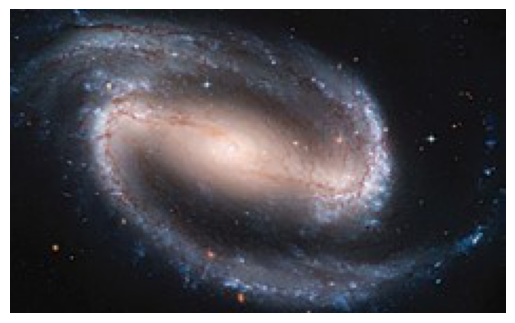

In [50]:
from PIL import Image
import matplotlib.pyplot as plt

# Load the image
img = Image.open("C:\\users\\antony\\Desktop\\tensorflow\\basedata\\testing\\astronuts\\ap7295(1).jpg")

# Display the image
plt.imshow(img)
plt.axis('off')  # Hide axes
plt.show()

In [52]:
import cv2  # Import the cv2 library

# Correct the file path and remove extra spaces
image_shape = cv2.imread("C:\\users\\antony\\Desktop\\tensorflow\\basedata\\testing\\astronuts\\ap7295(1).jpg").shape
print(image_shape)  # Print the shape of the image

(144, 235, 3)



To fix this, you should combine the import statement into a single line. The corrected line should look like this:

In [58]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [106]:
train=ImageDataGenerator(rescale=1/255)
validation=ImageDataGenerator(rescale=1/255)


In [165]:
train_dataset=train.flow_from_directory('C:\\Users\\Antony\\Desktop\\tensorflow\\basedata\\training',target_size=(200,200),batch_size=2,class_mode='binary')
validation_dataset=validation.flow_from_directory('C:\\Users\\Antony\\Desktop\\tensorflow\\basedata\\validation',target_size=(200,200),batch_size=2,class_mode='binary')

Found 8 images belonging to 2 classes.
Found 8 images belonging to 2 classes.


In [167]:
train_dataset.class_indices

{'astronuts': 0, 'galazy': 1}

In [203]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(200, 200, 3)),  
    Flatten(),
    Dense(1, activation='sigmoid')  # Change to binary classification (2 classes)
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [207]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create ImageDataGenerator instances for rescaling
train = ImageDataGenerator(rescale=1/255)
validation = ImageDataGenerator(rescale=1/255)

# Load images and preprocess them to grayscale using 'color_mode'
train_dataset = train.flow_from_directory(
    'C:\\Users\\Antony\\Desktop\\tensorflow\\basedata\\training',
    target_size=(200, 200),
    batch_size=2,
    color_mode='grayscale',  # Specify grayscale mode here
    class_mode='binary'
)

validation_dataset = validation.flow_from_directory(
    'C:\\Users\\Antony\\Desktop\\tensorflow\\basedata\\validation',
    target_size=(200, 200),
    batch_size=2,
    color_mode='grayscale',  # Specify grayscale mode here
    class_mode='binary'
)


Found 8 images belonging to 2 classes.
Found 8 images belonging to 2 classes.


In [267]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(168, 178, 3)),  
    Flatten(),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [223]:
history = model.fit(
    train_dataset,
    steps_per_epoch=3,  # Control number of steps per epoch
    epochs=30,
    validation_data=validation_dataset,
    validation_steps=2  # Optional: define validation steps
)

Epoch 1/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - accuracy: 1.0000 - loss: 3.5440e-05 - val_accuracy: 1.0000 - val_loss: 8.6411e-05
Epoch 2/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 1.0000 - loss: 1.4738e-05 - val_accuracy: 1.0000 - val_loss: 9.3525e-05
Epoch 3/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 1.0000 - loss: 5.2944e-05 - val_accuracy: 1.0000 - val_loss: 8.3692e-05
Epoch 4/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 1.0000 - loss: 1.6630e-05 - val_accuracy: 1.0000 - val_loss: 2.6904e-09
Epoch 5/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 1.0000 - loss: 4.7944e-05 - val_accuracy: 1.0000 - val_loss: 6.4434e-06
Epoch 6/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 1.0000 - loss: 1.2915e-05 - val_accuracy: 1.0000 - val_loss: 7.1415e-05
Epoch 7/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - accuracy: 1.0000 - loss: 4.8128e-05 - val_accuracy: 1.0000 - val_loss: 6.9048e-05
Epoch 8/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 1.0000 -

In [244]:
validation_dataset.class_indices

{'astronuts': 0, 'galazy': 1}

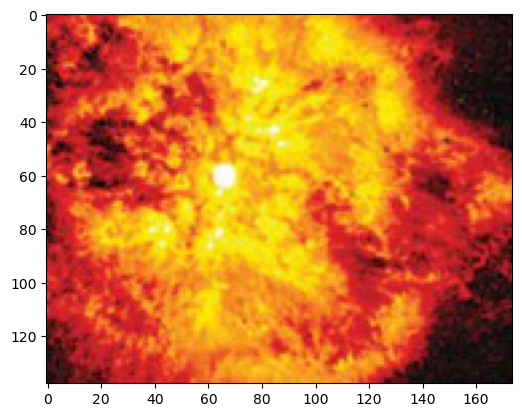

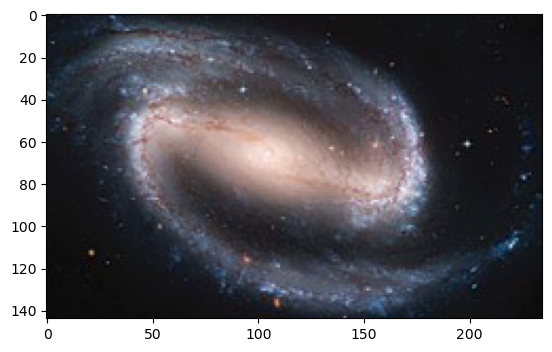

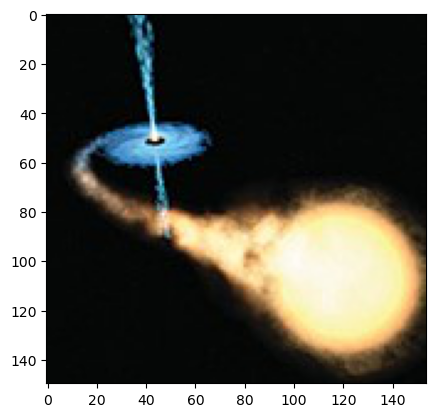

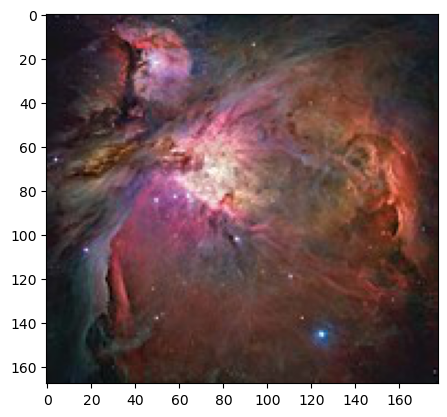

In [285]:
from tensorflow.keras.preprocessing.image import load_img
import os
import matplotlib.pyplot as plt

dir_path = 'C:\\Users\\Antony\\Desktop\\tensorflow\\basedata\\testing\\astronuts'

for i in os.listdir(dir_path):
    img = load_img(os.path.join(dir_path, i))  # Corrected method for loading images
    plt.imshow(img)
    plt.show()


In [26]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import os
import matplotlib.pyplot as plt
import numpy as np

dir_path = 'C:\\Users\\Antony\\Desktop\\tensorflow\\basedata\\testing\\astronuts'

# Define valid extensions for images
valid_extensions = {".jpg", ".jpeg", ".png"}

for i in os.listdir(dir_path):
    # Load and preprocess the image
    img = load_img(os.path.join(dir_path, i), target_size=(168, 178))  # Resize to match model input
    img_array = img_to_array(img)  # Convert image to numpy array
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array = img_array / 255.0  # Normalize if your model expects normalized input (range 0 to 1)

    # Predict with the model
    prediction = model.predict(img_array)
    
    # Display the image and prediction result
    plt.imshow(img)
    plt.show()
    
  # Interpret prediction with threshold adjustment
threshold = 2  # Modify based on validation
if prediction[1][1] > threshold:
    print(f"Prediction for {i}: Galazy")
else:
    print(f"Prediction for {i}: Astronuts")


NameError: name 'model' is not defined